# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

train, test = keras.datasets.cifar10.load_data()

## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

Using TensorFlow backend.


In [2]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [3]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 128, 32]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [4]:
## 超參數設定
"""
Set your required experiment parameters
"""
def optimizer_chooser(name='Adam', lr=1e-2):
    optimizer = {'SGD': keras.optimizers.SGD(lr=lr, nesterov=True, momentum=0.9), 
                 'RMSprop': keras.optimizers.RMSprop(lr=lr),
                 'Adagrad': keras.optimizers.Adagrad(lr=lr), 
                 'Adam': keras.optimizers.Adam(lr=lr)}
    return optimizer[name]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adam']
learning_rate = [1e-2, 1e-3]
epochs = 50
batch_size = 256

In [5]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for opt in optimizer:
    for lr in learning_rate:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print(f'optimizer = {opt}, learning_rate = {lr}')
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer_choosed = optimizer_chooser(name=opt, lr=lr)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer_choosed)

        model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        name_tag = f'optimizer = {opt}, learning_rate = {lr}'
        results[name_tag] = {'train-loss': train_loss, 'valid-loss': valid_loss, 
                             'train-acc': train_acc, 'valid-acc': valid_acc}

optimizer = SGD, learning_rate = 0.01
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                4128      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 1,643,498
Trainable params: 1,643,498
Non-trainable params: 0
_________________________________________________________________
Instructions for updat

50000/50000 [==============================] - 5s 109us/step - loss: 0.6089 - acc: 0.7846 - val_loss: 1.8268 - val_acc: 0.5074
Epoch 49/50
50000/50000 [==============================] - 5s 110us/step - loss: 0.5932 - acc: 0.7879 - val_loss: 1.8706 - val_acc: 0.5103
Epoch 50/50
50000/50000 [==============================] - 6s 110us/step - loss: 0.5868 - acc: 0.7933 - val_loss: 1.7168 - val_acc: 0.5237
optimizer = SGD, learning_rate = 0.001
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
hidden_layer3 (Dense)       

50000/50000 [==============================] - 5s 105us/step - loss: 1.1487 - acc: 0.5944 - val_loss: 1.3849 - val_acc: 0.5139
Epoch 50/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.1420 - acc: 0.5969 - val_loss: 1.3568 - val_acc: 0.5230
optimizer = RMSprop, learning_rate = 0.01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                4128      
_________________________________________________________________
output (Dense)               (No

50000/50000 [==============================] - 6s 123us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 6s 120us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
optimizer = RMSprop, learning_rate = 0.001
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                4128      
_________________________________________________________________
output (Dense)             

50000/50000 [==============================] - 5s 107us/step - loss: 1.0164 - acc: 0.6342 - val_loss: 1.5755 - val_acc: 0.5043
optimizer = Adagrad, learning_rate = 0.01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                4128      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 1,643,498
Trainable params: 1,643,498
Non-trainable params: 0
_____________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.0907 - acc: 0.2335 - val_loss: 2.0395 - val_acc: 0.2584
Epoch 2/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.8772 - acc: 0.3319 - val_loss: 1.8558 - val_acc: 0.3312
Epoch 3/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.7968 - acc: 0.3676 - val_loss: 1.7748 - val_acc: 0.3794
Epoch 4/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.7479 - acc: 0.3873 - val_loss: 1.7412 - val_acc: 0.3924
Epoch 5/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.7129 - acc: 0.4009 - val_loss: 1.7217 - val_acc: 0.3997
Epoch 6/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.6854 - acc: 0.4106 - val_loss: 1.7532 - val_acc: 0.3669
Epoch 7/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.6616 - acc: 0.4201 - val_loss: 1.6720 - 

50000/50000 [==============================] - 6s 124us/step - loss: 14.4356 - acc: 0.1002 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 6s 113us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 6s 113us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 113us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [=======

50000/50000 [==============================] - 6s 123us/step - loss: 2.1447 - acc: 0.2024 - val_loss: 1.9760 - val_acc: 0.2633
Epoch 2/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.9425 - acc: 0.2735 - val_loss: 1.8817 - val_acc: 0.3132
Epoch 3/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.8156 - acc: 0.3379 - val_loss: 1.8358 - val_acc: 0.3145
Epoch 4/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.7434 - acc: 0.3694 - val_loss: 1.7364 - val_acc: 0.3811
Epoch 5/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.6666 - acc: 0.4007 - val_loss: 1.6252 - val_acc: 0.4120
Epoch 6/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.6021 - acc: 0.4235 - val_loss: 1.5818 - val_acc: 0.4359
Epoch 7/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.5585 - acc: 0.4400 - val_loss: 1.5668 - val_acc: 0.4381
Epoch 8/50
50000/50000 [=====================

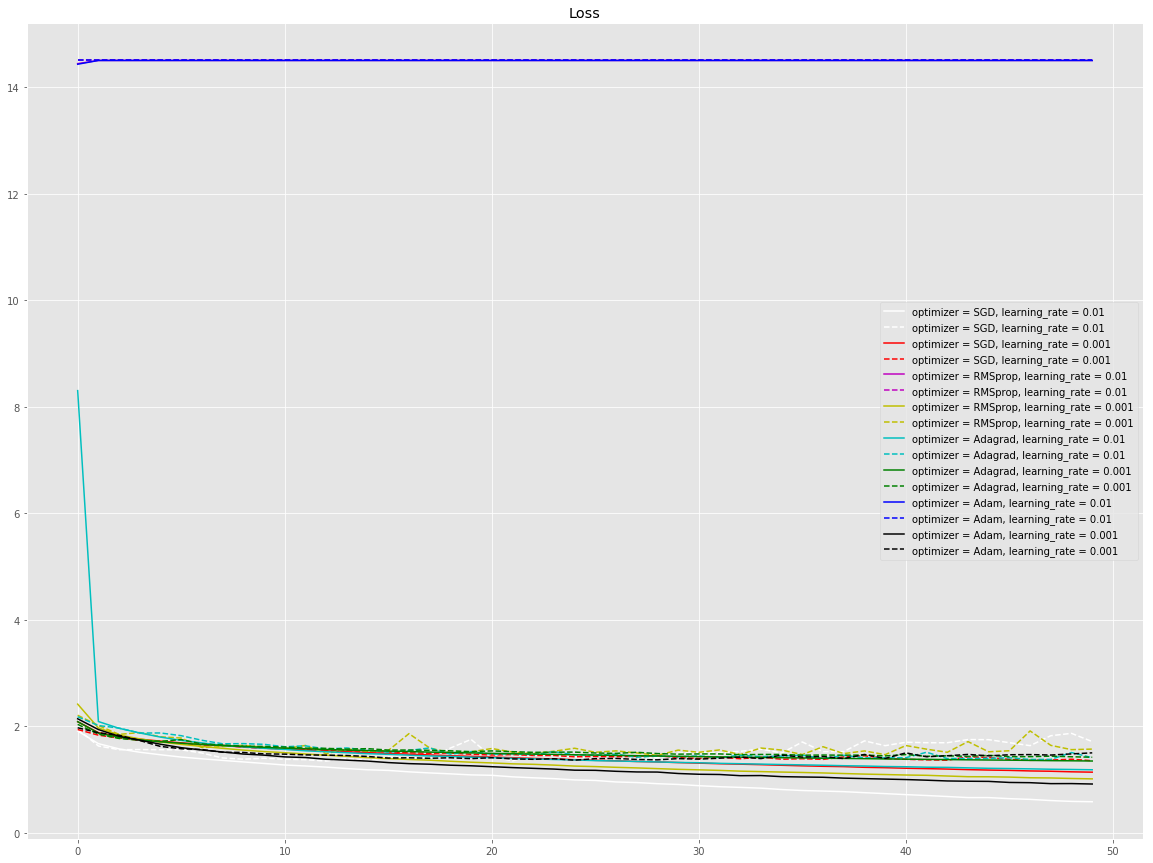

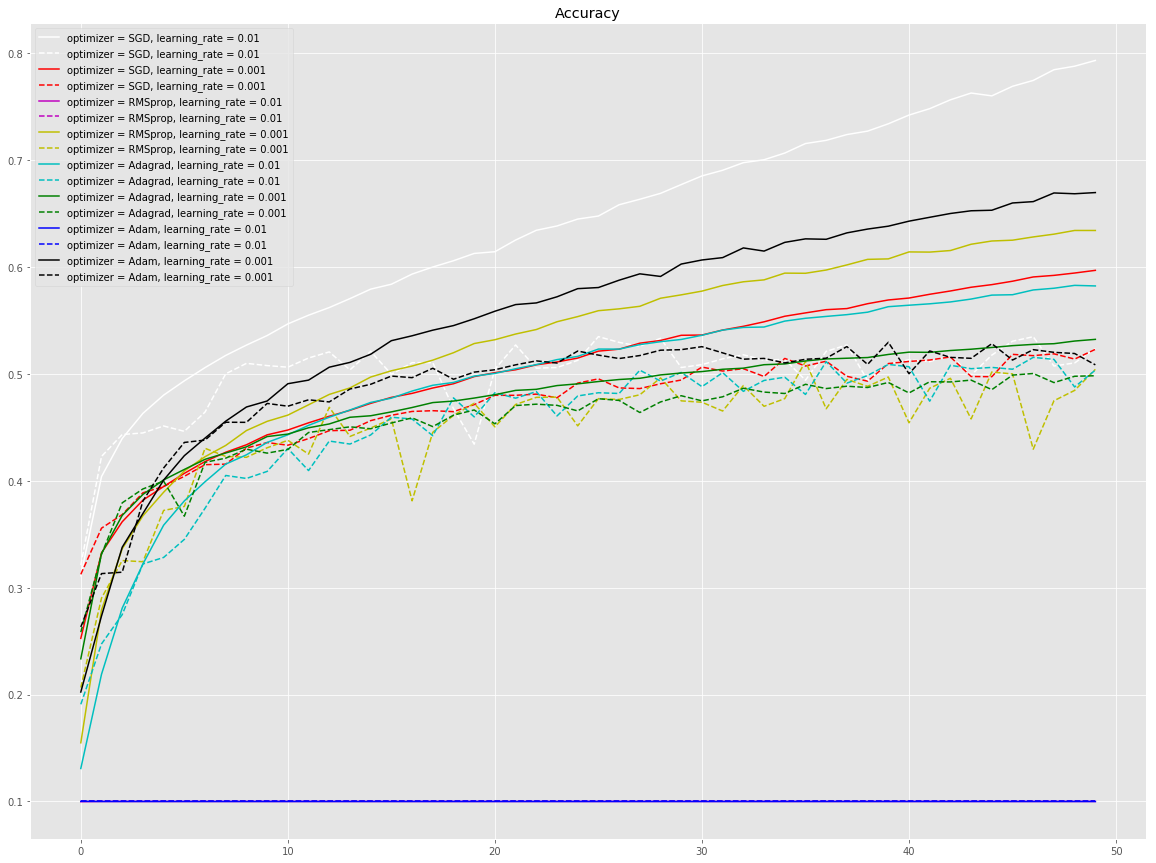

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
將實驗結果繪出
"""
plt.style.use('ggplot')
color_bar = ['w', "r", "m", "y" ,'c', "g", "b", "k"]

plt.figure(figsize=(20, 15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(20, 15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()